<a href="https://colab.research.google.com/github/405620294/classwork/blob/main/tf_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import tensorflow as tf
tf.__version__

'2.5.0'

# load data

In [193]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

# explore data

In [194]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [195]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [196]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


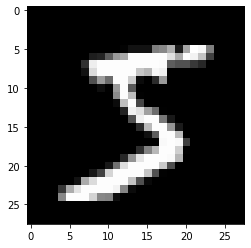

In [197]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')  # 0:black~255:white 

# preprocessing

In [198]:
# one hot encoding
from tensorflow.keras.utils import to_categorical
y_train_c = to_categorical(y_train, num_classes=10)
y_test_c = to_categorical(y_test, num_classes=10)

In [199]:
x_train_r = x_train.reshape(-1, 784) / 255.0
x_test_r = x_test.reshape(-1, 784) / 255.0

# create a model 

In [200]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

layers = [
      Dense(256, activation='relu', input_dim=784),  # 256*784+784=200960
      Dense(10, activation='softmax')  # 256*10+10=2570
]

model = Sequential(layers)

In [201]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [202]:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(optimizer='adam',
      loss=CategoricalCrossentropy(),
      metrics=["accuracy"])

# training

In [203]:
from tensorflow.keras.callbacks import EarlyStopping
callback = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
model.fit(x_train_r, y_train_c, batch_size=200, epochs=30, validation_split=0.1, verbose=2, callbacks=callback)

Epoch 1/30
270/270 - 2s - loss: 0.3719 - accuracy: 0.8971 - val_loss: 0.1644 - val_accuracy: 0.9548
Epoch 2/30
270/270 - 2s - loss: 0.1651 - accuracy: 0.9520 - val_loss: 0.1172 - val_accuracy: 0.9685
Epoch 3/30
270/270 - 2s - loss: 0.1160 - accuracy: 0.9666 - val_loss: 0.1020 - val_accuracy: 0.9720
Epoch 4/30
270/270 - 2s - loss: 0.0875 - accuracy: 0.9748 - val_loss: 0.0831 - val_accuracy: 0.9768
Epoch 5/30
270/270 - 2s - loss: 0.0683 - accuracy: 0.9812 - val_loss: 0.0757 - val_accuracy: 0.9775
Epoch 6/30
270/270 - 2s - loss: 0.0547 - accuracy: 0.9850 - val_loss: 0.0746 - val_accuracy: 0.9790
Epoch 7/30
270/270 - 2s - loss: 0.0448 - accuracy: 0.9880 - val_loss: 0.0697 - val_accuracy: 0.9805
Epoch 8/30
270/270 - 2s - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.0693 - val_accuracy: 0.9803
Epoch 9/30
270/270 - 2s - loss: 0.0293 - accuracy: 0.9924 - val_loss: 0.0725 - val_accuracy: 0.9795
Epoch 10/30
270/270 - 2s - loss: 0.0246 - accuracy: 0.9939 - val_loss: 0.0697 - val_accuracy: 0.9795

# envaluating

In [204]:
model.evaluate(x_test_r, y_test_c)

313/313 [==============================] - 1s 2ms/step - loss: 0.0655 - accuracy: 0.9784


[0.06549691408872604, 0.9783999919891357]

In [206]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_r)
pd.DataFrame(confusion_matrix(y_test, pre), 
             columns=[str(i)+'(預測)' for i in range(10)], 
             index=[str(i)+'(正確)' for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),968,0,2,1,1,0,4,1,2,1
1(正確),0,1124,3,0,0,1,2,0,5,0
2(正確),4,0,1009,2,1,0,2,8,5,1
3(正確),0,0,5,985,1,3,0,3,6,7
4(正確),1,0,2,1,964,0,2,2,0,10
5(正確),2,0,0,9,1,865,5,2,5,3
6(正確),6,2,0,1,4,4,940,0,1,0
7(正確),1,5,6,4,2,0,0,999,2,9
8(正確),5,0,2,5,5,4,1,4,944,4
9(正確),3,2,0,4,6,2,1,3,2,986


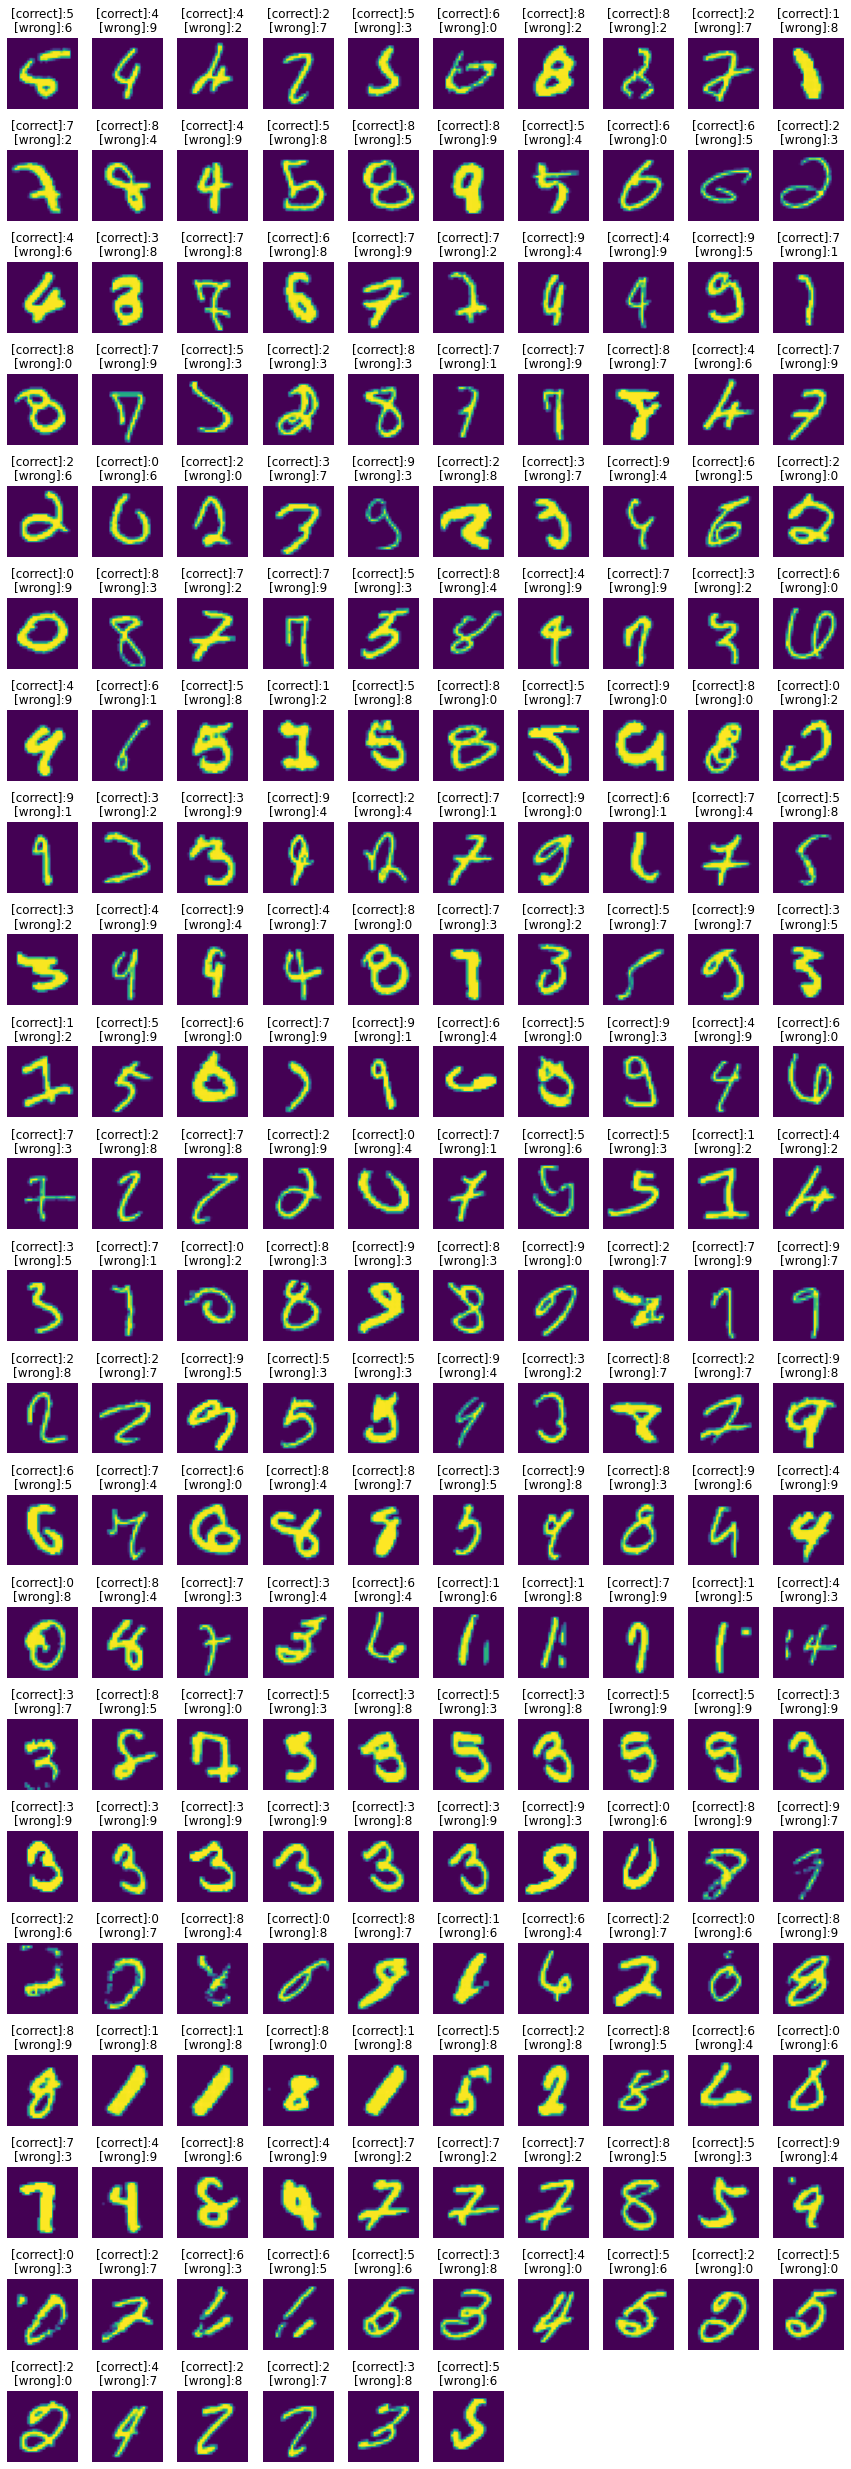

In [209]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
wrong_img = x_test[idx]
wrong_pre = pre[idx]
worng_label = y_test[idx]
plt.figure(figsize=(20,60))
w = 10
h = len(idx)/w +1
for i in range(len(idx)):
  plt.subplot(h, w, i+1)
  plt.imshow(wrong_img[i])
  t = '[correct]:{0}\n[wrong]:{1}'.format(worng_label[i], wrong_pre[i])
  plt.title(t)
  plt.axis('off')

# predict

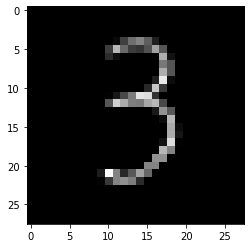

In [223]:
from PIL import Image
fn = '/content/shenduxuexichutan_test4.png'
img = Image.open(fn).resize((28,28)).convert('L')

plt.imshow(img, cmap='gray')

In [233]:
x_img_r = np.array(img).reshape(1, 784) / 255.0
model.predict_classes(x_img_r)[0]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


3

In [239]:
probability = model.predict(x_img_r)[0]
for i in range(10):
  print('預測', i, ':', probability[i])

預測 0 : 0.0339519
預測 1 : 0.05933034
預測 2 : 0.054477893
預測 3 : 0.28420976
預測 4 : 0.08038863
預測 5 : 0.16959578
預測 6 : 0.034421373
預測 7 : 0.052587315
預測 8 : 0.12501748
預測 9 : 0.10601948
